Importing Relevant Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile as SP
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('stircom.csv')

In [3]:
pip install fast_ml

     |████████████████████████████████| 42 kB 555 kB/s 


In [4]:
df

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,60912498,Glasgow,UK,31,management,single,tertiary,no,4.99,yes,no,unknown,3,9,jun,2,-1,0,unknown,no
50658,70632237,Chester,UK,31,technician,single,tertiary,no,6.65,yes,no,cellular,1,4,feb,1,-1,0,unknown,no
50659,14476386,Bolton,UK,60,retired,divorced,tertiary,no,4.39,no,yes,cellular,4,25,may,1,321,1,failure,yes
50660,63746806,Birmingham,UK,32,blue-collar,single,secondary,no,30.36,yes,no,cellular,5,31,jul,5,-1,0,unknown,no


In [5]:
df

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,60912498,Glasgow,UK,31,management,single,tertiary,no,4.99,yes,no,unknown,3,9,jun,2,-1,0,unknown,no
50658,70632237,Chester,UK,31,technician,single,tertiary,no,6.65,yes,no,cellular,1,4,feb,1,-1,0,unknown,no
50659,14476386,Bolton,UK,60,retired,divorced,tertiary,no,4.39,no,yes,cellular,4,25,may,1,321,1,failure,yes
50660,63746806,Birmingham,UK,32,blue-collar,single,secondary,no,30.36,yes,no,cellular,5,31,jul,5,-1,0,unknown,no


In [6]:
df=df.dropna()

In [7]:
categorical_features=['town','country','job','married','education','arrears','housing','has_tv_package','last_contact','last_contact_this_campaign_month','outcome_previous_campaign','contacted_during_previous_campaign']
numerical_features=['age','current_balance','conn_tr','this_campaign','days_since_last_contact_previous_campaign']

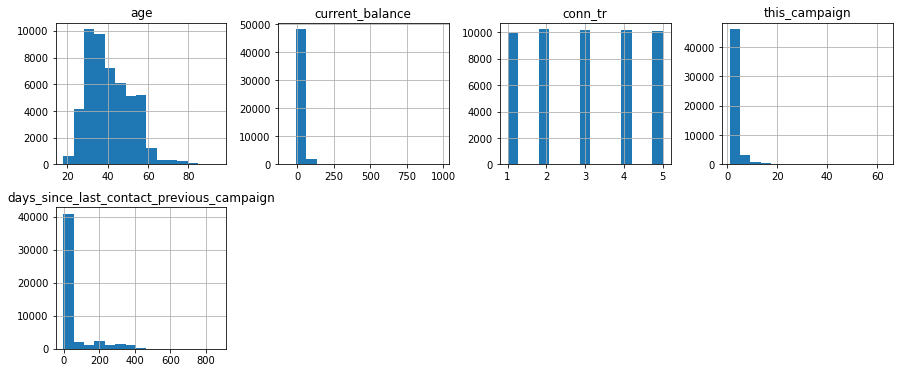

In [8]:
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4));

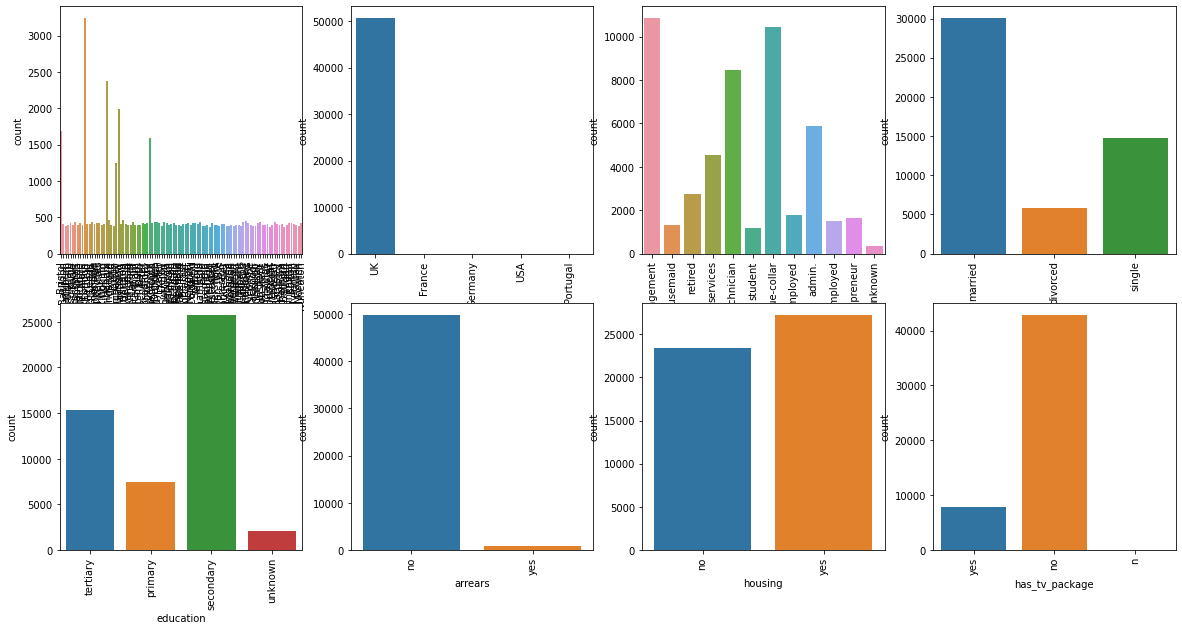

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot)
    
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [10]:
df[numerical_features].isnull().sum()

age                                          0
current_balance                              0
conn_tr                                      0
this_campaign                                0
days_since_last_contact_previous_campaign    0
dtype: int64

In [11]:
for col in categorical_features:
    print(col,':',df[col].unique())

town : ['Bristol' 'Basildon' 'Blackburn' 'Oldham' 'Middlesbrough' 'Poole'
 'Stockport' 'Wolverhampton' 'Eastbourne' 'Weston-super-Mare' 'London'
 'Sheffield' 'Leeds' 'Raleigh' 'Cambridge' 'Kingston upon Hull'
 'Milton Keynes' 'Nottingham' 'Woking' 'Birmingham' 'Basingstoke' 'Oxford'
 'Luton' 'Manchester' 'Glasgow' 'Worthing' 'Darlington' 'Sunderland'
 'Birkenhead' 'Chelmsford' 'Cardiff' 'Cheltenham' 'Portsmouth' 'Bath'
 'Chester' 'Bradford' 'Coventry' 'Liverpool' 'Bournemouth' 'Dundee'
 'County Down' 'Exeter' 'Derby' 'Swindon' 'Edinburgh' 'Hartlepool'
 'Gateshead' 'Rochdale' 'Reading' 'Hemel Hempstead' 'Wakefield' 'Belfast'
 'Worcester' 'Newport' 'Warrington' 'Sutton Coldfield' 'Solihull'
 'Telford' 'Northampton' 'Sale' 'Chesterfield' 'Brighton' 'Stevenage'
 'Leicester' 'Huddersfield' 'York' 'Newcastle upon Tyne' 'Preston'
 'Gloucester' 'Southend-on-Sea' 'Swansea' 'Peterborough' 'Aberdeen'
 'Watford' 'Gillingham' 'St Albans' 'Southampton' 'Maidstone' 'St Helens'
 'High Wycombe' 'Blackp

In [12]:
df.contacted_during_previous_campaign.value_counts()

0      40608
1       3284
2       2530
3       1459
4        859
5        571
6        356
7        260
8        163
9        119
10        94
11        81
12        53
13        47
17        25
14        22
15        22
19        15
16        13
23        10
20         9
22         7
18         7
27         6
29         4
21         4
25         4
24         4
30         4
26         3
28         3
40         2
58         2
37         2
41         2
55         2
38         2
32         1
275        1
35         1
51         1
Name: contacted_during_previous_campaign, dtype: int64

In [13]:
df.has_tv_package.value_counts()

no     42886
yes     7771
n          5
Name: has_tv_package, dtype: int64

In [14]:
df.town.value_counts()

London             3241
Birmingham         2383
Glasgow            1991
Bristol            1693
Liverpool          1591
                   ... 
Southend-on-Sea     375
Blackburn           373
Southport           372
Bedford             367
Stevenage           360
Name: town, Length: 101, dtype: int64

In [15]:
df.loc[df["has_tv_package"] == "n", "has_tv_package"] = 'no'

In [16]:
df.has_tv_package.value_counts()

no     42891
yes     7771
Name: has_tv_package, dtype: int64

In [17]:
df.last_contact_this_campaign_month.value_counts()

may    14869
jul     7540
aug     6934
jun     5912
nov     4416
apr     3471
feb     3072
jan     1570
oct     1034
sep      839
mar      701
dec      303
j          1
Name: last_contact_this_campaign_month, dtype: int64

In [18]:
df = df[df.last_contact_this_campaign_month != 'j']

In [19]:
df.last_contact_this_campaign_month.value_counts()

may    14869
jul     7540
aug     6934
jun     5912
nov     4416
apr     3471
feb     3072
jan     1570
oct     1034
sep      839
mar      701
dec      303
Name: last_contact_this_campaign_month, dtype: int64

In [20]:
df.country.value_counts()

UK          50656
France          2
Germany         1
USA             1
Portugal        1
Name: country, dtype: int64

In [21]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features
# Use the function to get the results in dataframe
constant_features = get_constant_features(df,threshold=0.99,dropna=False)
display_all(constant_features)
# All the constant features stored in a list
constant_features_list = constant_features['Var'].to_list()
# Drop all the constant features from the dataset
df.drop(columns = constant_features_list, inplace=True)

,Desc,Var,Value,Perc
0,Quasi Constant,country,UK,99.99013


In [22]:
df

,ID,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,60912498,Glasgow,31,management,single,tertiary,no,4.99,yes,no,unknown,3,9,jun,2,-1,0,unknown,no
50658,70632237,Chester,31,technician,single,tertiary,no,6.65,yes,no,cellular,1,4,feb,1,-1,0,unknown,no
50659,14476386,Bolton,60,retired,divorced,tertiary,no,4.39,no,yes,cellular,4,25,may,1,321,1,failure,yes
50660,63746806,Birmingham,32,blue-collar,single,secondary,no,30.36,yes,no,cellular,5,31,jul,5,-1,0,unknown,no


In [23]:
categorical_features.remove('country')

In [24]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in categorical_features:
    df = create_dummies(df,column)

In [25]:
df

,ID,town,age,job,married,education,arrears,current_balance,housing,has_tv_package,...,contacted_during_previous_campaign_32,contacted_during_previous_campaign_35,contacted_during_previous_campaign_37,contacted_during_previous_campaign_38,contacted_during_previous_campaign_40,contacted_during_previous_campaign_41,contacted_during_previous_campaign_51,contacted_during_previous_campaign_55,contacted_during_previous_campaign_58,contacted_during_previous_campaign_275
0,32390233,Bristol,39,management,married,tertiary,no,-1.90,no,yes,...,0,0,0,0,0,0,0,0,0,0
1,41226029,Basildon,53,housemaid,married,primary,no,3.62,no,no,...,0,0,0,0,0,0,0,0,0,0
2,85498057,Blackburn,79,retired,divorced,primary,no,27.87,no,no,...,0,0,0,0,0,0,0,0,0,0
3,76539627,Oldham,43,services,single,secondary,no,5.50,yes,no,...,0,0,0,0,0,0,0,0,0,0
4,76290986,Middlesbrough,35,technician,single,secondary,no,3.44,no,no,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,60912498,Glasgow,31,management,single,tertiary,no,4.99,yes,no,...,0,0,0,0,0,0,0,0,0,0
50658,70632237,Chester,31,technician,single,tertiary,no,6.65,yes,no,...,0,0,0,0,0,0,0,0,0,0
50659,14476386,Bolton,60,retired,divorced,tertiary,no,4.39,no,yes,...,0,0,0,0,0,0,0,0,0,0
50660,63746806,Birmingham,32,blue-collar,single,secondary,no,30.36,yes,no,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.drop(['ID'],inplace=True,axis=1)

In [27]:
df.drop(categorical_features,inplace=True,axis=1)

In [28]:
df

,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,new_contract_this_campaign,town_Aberdeen,town_Barnsley,town_Basildon,...,contacted_during_previous_campaign_32,contacted_during_previous_campaign_35,contacted_during_previous_campaign_37,contacted_during_previous_campaign_38,contacted_during_previous_campaign_40,contacted_during_previous_campaign_41,contacted_during_previous_campaign_51,contacted_during_previous_campaign_55,contacted_during_previous_campaign_58,contacted_during_previous_campaign_275
0,39,-1.90,4,11,8,-1,yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,53,3.62,1,28,2,-1,yes,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,79,27.87,3,13,1,377,yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43,5.50,3,13,2,-1,no,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,3.44,2,27,16,-1,yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,31,4.99,3,9,2,-1,no,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50658,31,6.65,1,4,1,-1,no,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50659,60,4.39,4,25,1,321,yes,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50660,32,30.36,5,31,5,-1,no,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
corr = df.corr()

In [30]:
X = df.loc[:, df.columns != 'new_contract_this_campaign']


In [31]:
sns.set(rc={'figure.figsize':(10,8)})

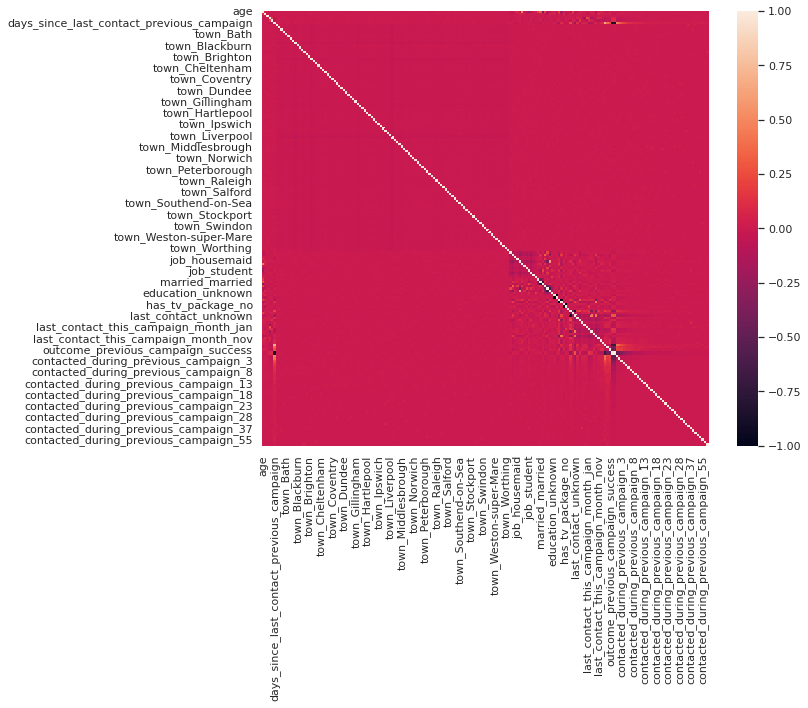

In [32]:
sns.heatmap(corr)

In [33]:
y = df['new_contract_this_campaign']

In [34]:
selector = SP(percentile=30) # select features with top 30% MI scores
selector.fit(X,y)
X = selector.transform(X)


In [35]:
X_train,X_test,y_train,y_test = tts(X,y,random_state=0,stratify=y)

In [36]:
# from imblearn.under_sampling import RandomUnderSampler  

# under_sampler = RandomUnderSampler()
# X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [37]:
tree_model = DTC().fit(X_train,y_train)
tree_score = tree_model.score(X_test,y_test)

In [38]:
print(f"Score of Tree Model:{tree_score}")

Score of Tree Model:0.8821253750197379


In [39]:
y_prediction_tree = tree_model.predict(X_test)
print(classification_report(y_test, y_prediction_tree))

              precision    recall  f1-score   support

          no       0.95      0.90      0.92     10191
         yes       0.66      0.80      0.73      2475

    accuracy                           0.88     12666
   macro avg       0.81      0.85      0.83     12666
weighted avg       0.89      0.88      0.89     12666



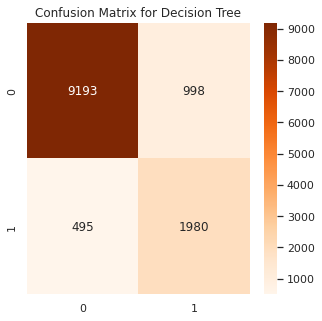

In [40]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_prediction_tree)
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix for Decision Tree')
sns.heatmap(cm, annot=True,fmt='g',cmap='Oranges')
plt.show()

In [41]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=10000, multi_class='auto', n_jobs=None, random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
lr_model = lr.fit(X_train,y_train)
lr_score = lr_model.score(X_test,y_test)

In [42]:
y_prediction_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_prediction_lr))

              precision    recall  f1-score   support

          no       0.85      0.97      0.90     10191
         yes       0.69      0.27      0.39      2475

    accuracy                           0.83     12666
   macro avg       0.77      0.62      0.64     12666
weighted avg       0.81      0.83      0.80     12666



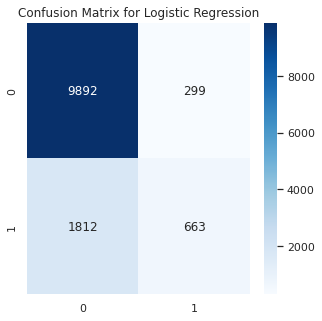

In [43]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_prediction_lr)
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(cm, annot=True,fmt='g',cmap='Blues')
plt.show()

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
df.loc[df["new_contract_this_campaign"] == "yes", "new_contract_this_campaign"] = 1
df.loc[df["new_contract_this_campaign"] == "no", "new_contract_this_campaign"] = 0
y = df['new_contract_this_campaign']
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')
X_train,X_test,y_train,y_test = tts(X,y,random_state=0,stratify=y)

In [47]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [48]:
from tensorflow import keras
model = keras.Sequential(
 [
 keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[-1],)),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(256, activation="relu"),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(1, activation="sigmoid"),
 ]
)
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy',f1_m,precision_m, recall_m])
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1888      
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 39,393
Trainable params: 39,393
Non-traina

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=metrics.confusion_matrix(df_pred['prediction'],df_pred['true'])
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='g',cmap='Oranges')

396/396 [==============================] - 3s 7ms/step - loss: 0.4289 - accuracy: 0.8274 - f1_m: 0.2444 - precision_m: 0.5792 - recall_m: 0.1659
Accuracy score:  0.827411949634552
Loss:  0.42891925573349


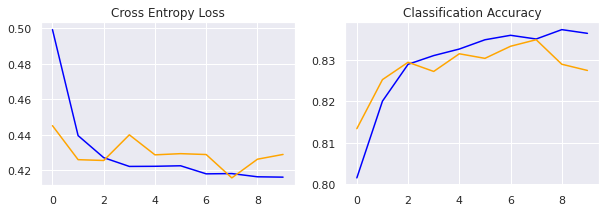

In [49]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    acc = model.evaluate(X_test, y_test)
    test_loss=acc[0]
    test_accuracy=acc[1]
    print("Accuracy score: ",test_accuracy)
    print("Loss: ",test_loss)
    histories=[]
    scores=[]
    scores.append(acc)
    histories.append(history)
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    for i in range(len(histories)):
       # plot loss
       
      
      ax[0].set_title('Cross Entropy Loss')
      ax[0].plot(histories[0].history['loss'], color='blue', label='train')
      ax[0].plot(histories[0].history['val_loss'], color='orange', label='test')
      # plot accuracy
      
      ax[1].set_title('Classification Accuracy')
      ax[1].plot(histories[0].history['accuracy'], color='blue', label='train')
      ax[1].plot(histories[0].history['val_accuracy'], color='orange', label='test')
      plt.show()
    return test_loss, test_accuracy
 
test_loss, test_accuracy = eval_model(model, X_test, y_test)

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

ValueError: ignored

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_prediction_tree)
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix for Decision Tree')
sns.heatmap(cm, annot=True,fmt='g',cmap='Oranges')
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.85      0.97      0.91     10191
         yes       0.69      0.30      0.42      2475

    accuracy                           0.84     12666
   macro avg       0.77      0.64      0.66     12666
weighted avg       0.82      0.84      0.81     12666



In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
lr = LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='none', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])


In [ ]:



# # instantiate the model
# logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
model1.fit(X_res, y_res)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
predictions = model1.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize = (5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='g',cmap='Oranges')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
clf = DecisionTreeClassifier(random_state=0,max_depth=190)
# pca = PCA(n_components=30)
# fit = pca.fit(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# under_sampler = RandomUnderSampler()
# X_res, y_res = under_sampler.fit_resample(X_train, y_train)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


0.8808621506395073
              precision    recall  f1-score   support

          no       0.95      0.90      0.92     10191
         yes       0.66      0.80      0.73      2475

    accuracy                           0.88     12666
   macro avg       0.80      0.85      0.82     12666
weighted avg       0.89      0.88      0.89     12666



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
model1.fit(X_res, y_res)
predictions = model1.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [1]:
logreg.fit(X_res, y_res)
predictions = logreg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

NameError: name 'logreg' is not defined